# Практическая работа №1: Краевая задача для уравнения II-го порядка.

Выполнила студентка гр. 9382 Голубева Валентина, вариант 21

## Цель работы

Научиться применять дифференциальные уравнения в различных областях, решать краевую задачу для уравнения II-го порядка путём многократного решения задачи Коши.

## Основные теоретические положения

### Задача Коши

Система ОДУ первого порядка:
\begin{cases}
    y'_1 = f(x, y_1, ..., y_n) \\
    ... \\
    y'_n = f(x, y_1, ..., y_n) \\
    y_1(a) = y_{1a} \\
    ... \\
    y_n(a) = y_{na}
\end{cases}

Решение заключается в поиске интеграла, который удовлетворяет начальным условиям.

### Краевая задача
Дано: уравнение $y'' = f(x, y, y'), a<=x<=b$ (1) и два числа $(y_a, y_b)$.

Требуется: найти решение уравнения (1), удовлетворяющее условиям \begin{cases}
    y(b) = y_a (2) \\
    y(a) = y_b
\end{cases}

Задача, решение которой заключается в поиске интеграла дифференциального уравнения такого, что значение интеграла на краях отрезка удовлетворяет условию.

### Метод половинного деления

Алгоритм, который позволяет найти корень функции. Суть алгоритма заключается в сужении области, где находится корень. Определение, есть ли в области корень происходит за счет сравнения знаков значения функции на концах области: если знаки разные, значит корень существует.

## Постановка задачи

Дано дифференциальное уравнение: $y'' = f(x, y), a < x < b$ (1) и граничные условия.

$y(a) = y_a, y(b) = y_b$ (2)

Требуется найти решение задачи (1)-(2) и построить его график. Рассмотрим задачу Коши для уравнения (1) с начальными условиями.

$y(a) = y_a, y'(a) = h$ (3)

План решения основан на многократном решении задачи Коши (1), (3). Значение решения задачи Коши при $x = b$ является функцией от h.

Задача сводится к отысканию такого значения переменной h, при котором выполнено условие на правом конце отрезка, т.е. должно выполняться

$y(b, h) = y_b$ (4)

Это уравнение с одним неизвестным h.
Для его решения можно применить стандартный метод половинного
деления.

## Выполнение работы
$y'' = \sqrt{y}*(x^2 - 1)$  
$a = 0; b = 2; y_a = 4; y_b = 1$

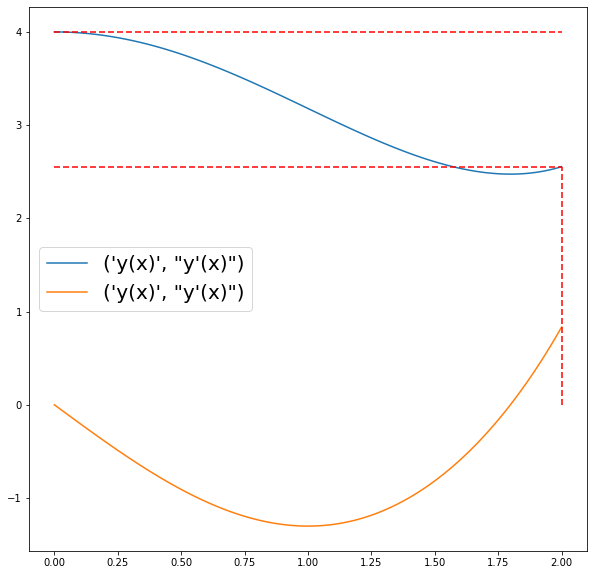

При h =  0 y(b, h) =  2.5539374880637653


In [32]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def function_x_y(y, x):
    return [y[1], math.sqrt(y[0])*(x**2 - 1)]

a = 0
b = 2
y_a = 4
y_b = 1
h = 0

dx = np.linspace(a, b, 100, True)
sol = odeint(function_x_y, [y_a, h], dx)
y_bh = sol[-1][0]

plt.figure(figsize=(10, 10))
plt.plot(dx, sol, label = ("y(x)", "y'(x)"))
plt.plot(dx, [y_bh]*100, dashes = (4, 2), color="red")
plt.plot(dx, [4]*100, dashes = (4, 2), color="red")
plt.plot([2]*100, np.linspace(h, y_bh, 100, True), dashes = (4, 2), color="red")
plt.legend(prop = {"size": 20})
plt.show()
print("При h = ", h, "y(b, h) = ", y_bh)

На графике можно видеть кривые, полученные после интегрирования системы уравнений первого порядка.  
Т.к. $|y(b, h) - 4| >= 0.001$, можно сделать вывод, что начальное приближение h не является решением краевой задачи.

Реализуем алгоритм поиска h, многократно решая задачу Коши. Возьмём начальный шаг, равный -1.

Проверяем направление шага - его знак. Если значение $y(b, h_m)$ больше значения на предыдущем шаге, то $y_b$ по ту же сторону, что и $y(b,h_{m-1})$, то надо поменять знак на противоположный.

На каждой итерации алгоритма последовательно вычисляем $h_m, h_{m+1}$ и тд и соответствующих им $y(b,h_m),y(b,h_{m+1})$ и тд и затем применяем половинное деление отрезка $[h_m, h_{m-1}]$, когда $h_b \in [h_m, h_{m-1}]$. Направление шага меняется в связи с делением отрезка, из-за того, что $sign(h_b-h_m)$ противоположен знаку шага.



h: -0.7314453125 
y(b, h): 1.0003078141002295


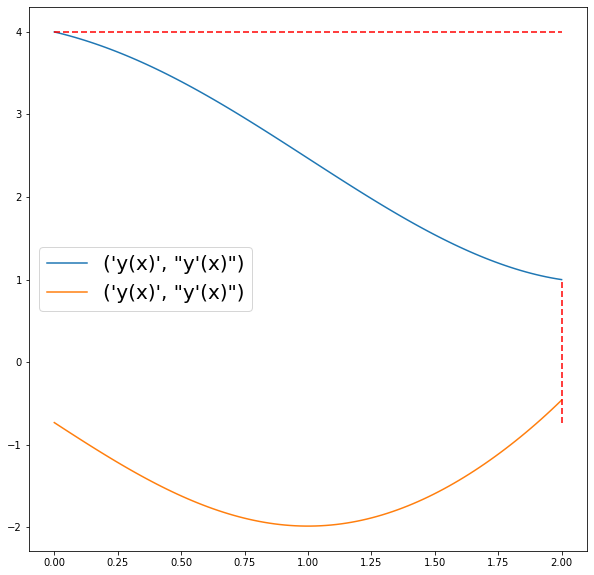

In [33]:
dh = -1
m = 0
M = 100

sol = odeint(function_x_y, [y_a, h + dh], dx)
if np.abs(y_bh - y_b) < np.abs(sol[-1][0] - y_b) and np.sign(y_bh - y_b) == np.sign(sol[-1][0] - y_b):
    dh = -dh

while np.abs(y_bh - y_b) >= 0.001:
    h += dh
    sol = odeint(function_x_y, [y_a, h], dx)
    
    while np.sign(y_bh - y_b) == np.sign(sol[-1][0] - y_b) and np.abs(y_bh - y_b) > np.abs(sol[-1][0] - y_b):
        y_bh = sol[-1][0]
        h += dh
        sol = odeint(function_x_y, [y_a, h], dx)
    
    y_bh = sol[-1][0]
    dh = -dh/2
    
    m += 1
    if m > M:
        break

print("h:", h, "\ny(b, h):", y_bh)

plt.figure(figsize=(10, 10))
plt.plot(dx, sol, label = ("y(x)", "y'(x)"))
plt.plot(dx, [4]*100, dashes = (4, 2), color="red")
plt.plot([2]*100, np.linspace(h, y_bh, 100, True), dashes = (4, 2), color="red")
plt.legend(prop = {"size": 20})
plt.show()



Т.к. $|y(b,h_b) - 4| < 0.001$, решение краевой задачи найдено. $h_b$ = -0.73

## Выводы

Был получен навык применения диффуренциальных уравнений в различных областях, также был получен навык решения краевой задачи для уравнения ||-го порядка путём многократного решения задачи Коши.